# 实验三、 Matlab图像手动配准实验

## 1. 读入图像，构造配准图像对

In [1]:
clear;
origin_img = imread('cameraman.tif');
% [row, column, channel] = size(origin_img)
transform_img = imrotate(imresize(origin_img, 1.6), 30);
crop_img = imcrop(transform_img,[150, 150, 255, 255]);

**API说明**：
1. imread()  读入图片转换成一个矩阵
2. imresize(Img, factor)，把图片放大factor倍
3. imrotate(Img, degree), 把图片逆时针旋转degree°
4. imcrop(Img, [a, b, c, d]), 裁剪一个矩形，左上角坐标是[a, b]， 高为c，长为d


## 2. 显示

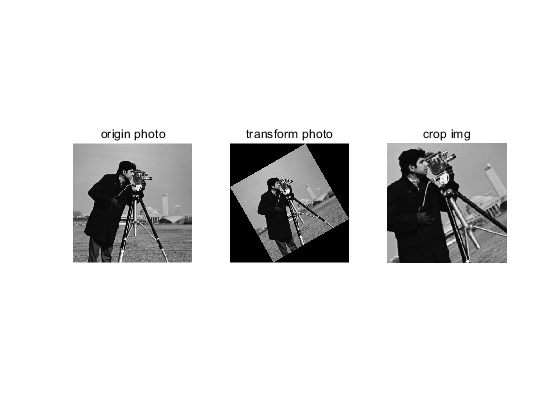

In [3]:
figure; 
subplot(1,3,1); imshow(origin_img); title("origin photo");
subplot(1,3,2); imshow(transform_img); title("transform photo");
subplot(1,3,3); imshow(crop_img); title("crop img");

**API说明**：
1. figure; 创建一个绘图窗口
2. subplot(a, b, c); 把画板分成a×b个子图，当前是第c张子图
3. imshow(Img);  在当前子图上显示Img
4. title(""); 给图片添加标题


## 3. 手动选择标记点

##### 注意：
1. 投影正变换需要至少2对点
2. 仿射变换需要至少3对点
3. 投影变换需要至少4对点
4. 提取特征点时，不要多点共线，会造成线性方程奇异，降低求解精度。

In [46]:
cpselect(crop_img, origin_img);

In [47]:
movingPoints
fixedPoints


movingPoints =

   77.4375   38.9375
   52.8125   47.4375
   75.9375  135.5625
  176.1875  177.6875
  150.8125  116.9375


fixedPoints =

  128.5625   62.6875
  111.9375   58.3125
   96.6875  112.8125
  136.6875  166.1875
  142.4375  126.4375




## 4. 计算变换矩阵和进行变换

In [48]:
% calculate transform function
t1 = cp2tform(movingPoints,fixedPoints,'linear conformal');
t2 = cp2tform(movingPoints,fixedPoints,'affine');
t3 = cp2tform(movingPoints,fixedPoints,'projective');

% transform 
imgout_1 = imtransform(crop_img,t1,'XData',[1 256],'YData',[1 256]);
imgout_2 = imtransform(crop_img,t2,'XData',[1 256],'YData',[1 256]);
imgout_3 = imtransform(crop_img,t3,'XData',[1 256],'YData',[1 256]);

**API说明**:
1. cp2transform，根据提取的控制点计算变换函数
2. imtransform，对图片进行变换

### 4.1 线性正投影

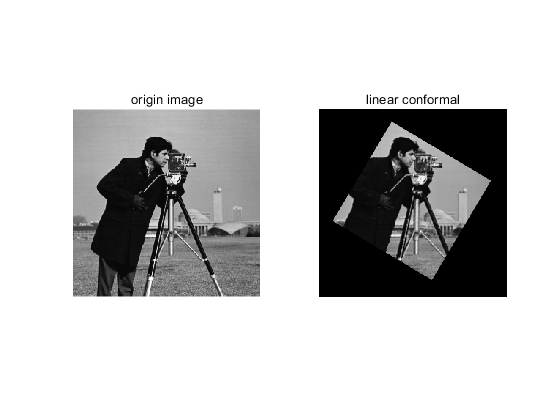

In [55]:
figure;
subplot(1,2,1); imshow(origin_img); title("origin image");
subplot(1,2,2); imshow(imgout_1); title("linear conformal");

### 4.2 仿射变换

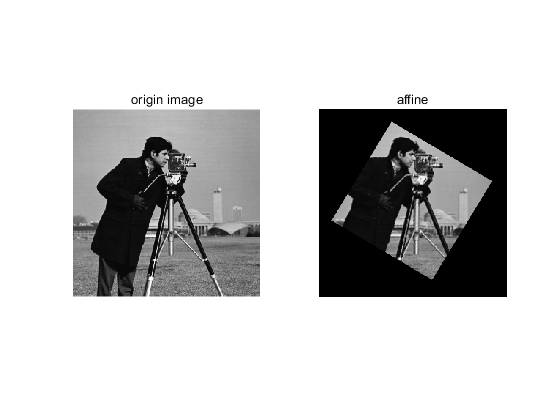

In [54]:
subplot(1,2,1); imshow(origin_img); title("origin image");
subplot(1,2,2); imshow(imgout_2); title("affine");

### 4.3 投影变换

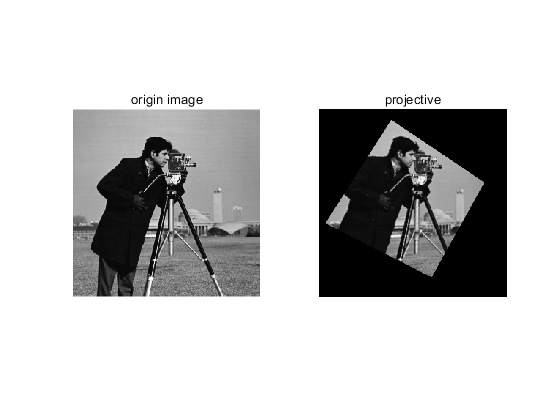

In [56]:
subplot(1,2,1);imshow(origin_img);title("origin image");
subplot(1,2,2);imshow(imgout_3);title("projective")

## 5. MSE计算

最后计算MSE作为衡量配准效果好坏的测度。

$$ MSE = \frac{1}{N \times M}\sum_{i=1}^{N}\sum_{j=1}^{M}(f(x_i, y_j) - \hat{f}(x_i, y_j))^2$$

**注意**:
1. 黑边提取与剔除。
2. 比较不同变换下的MSE，解释原因。